In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.head()
# Head will give you the first 5 default rows 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.tail()
# same tail will give the last 5 rows data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


Now lets check how many rows and columns are there

In [5]:
df.shape


(13320, 9)

for checking rows and columns we use shape 
as u can see there are 13320 rows and 9 columns in this dataset we will say feature = column and rows = records

lets check for the data type of the column

In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

by using dtypes u can see the most of the columns are object and the remaining are float values

In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## Data Issues and Cleaning

### Missing Values
The data count shows some variability, which indicates there might be missing values present. We need to identify and handle these missing values to maintain data accuracy.

### Bathroom Counts
- **Average:** 2 bathrooms per house
- **Maximum:** 40 bathrooms

The maximum value of 40 bathrooms is significantly higher than the average and is likely an outlier or error. We should investigate these values to determine if they should be corrected or removed.

### House Prices
- **Averae Price:** $112
- **Maxium Price:** $3,600

The maximum house price of $3,600 is much higher than 75% of the data and could be an outlier. We need to examine these high values to ensure they don't skew our analysis or result from data entry errors.

**Action Items:**
1. Identify and address missing values.
2. Investigate and possibly correct or remove outliers in bathroom counts and house prices.


In [8]:
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

                   area_type   availability    location   size  society  \
count                  13320          13320       13319  13304     7818   
unique                     4             81        1305     31     2688   
top     Super built-up  Area  Ready To Move  Whitefield  2 BHK  GrrvaGr   
freq                    8790          10581         540   5199       80   

       total_sqft  
count       13320  
unique       2117  
top          1200  
freq          843  


#### Null values

now lets check for null values

In [9]:
df.info()
# this is one way to check the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


other way to check null values

In [10]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

as u can see the society as the highest amt of null values

lets see its missing percentage

In [11]:
missing_df_percentage = dict(df.isna().sum() / len(df) * 100)
missing_df_percentage

{'area_type': 0.0,
 'availability': 0.0,
 'location': 0.0075075075075075074,
 'size': 0.12012012012012012,
 'society': 41.306306306306304,
 'total_sqft': 0.0,
 'bath': 0.5480480480480481,
 'balcony': 4.572072072072072,
 'price': 0.0}

Given that the "society" feature has 41% missing data, which exceeds the 30% threshold, it’s advisable to consider dropping this column. Here’s why:

Why Drop the Column?
High Percentage of Missing Data: With 41% of the data missing, this column has a significant amount of incomplete information. Such a high proportion of missing values can indicate that the column might not be reliable or useful for analysis.

Information Loss: A column with this much missing data means that a large portion of the information it could potentially provide is unavailable. This can diminish the quality and completeness of the dataset.

Data Handling: Managing a column with over 30% missing data can be challenging. Imputing or filling in these missing values might not always be effective and could introduce bias or inaccuracies into the dataset.

Best Practice: It is generally considered good practice to drop columns with more than 30% missing data. This approach helps to streamline the dataset, making it more manageable and potentially improving the performance of data analysis and machine learning models.

In summary, dropping the "society" column is a practical step given its high percentage of missing data. It ensures that you are working with a cleaner dataset, where the remaining features are more complete and reliable.

In [12]:
df_1 = df.drop(columns = 'society')

In [13]:
df_1.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [27]:
df_1

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [28]:
df_1.dropna(inplace=True)
# for now we are dropping the columns who have null values


In [29]:
df_1.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [30]:
df_1.shape
# now the columns and rows has been changed

(12710, 8)

In [46]:
df_1['total_sqft'] = pd.to_numeric(df_1['total_sqft'],errors= 'coerce')
df_1['total_sqft'] = df_1['total_sqft'].fillna(0).astype(int)
# df['Numbers'] = df['Numbers'].fillna(0).astype(int)

In [47]:
df_1['total_sqft'].dtype

dtype('int32')

In [48]:
def univariate_analysis(n):
    if not isinstance(n,pd.DataFrame):
        raise TypeError("input must a pandas dataframe")

    for column in n.columns:
        if n[column].dtype == 'object':

            plt.figure(figsize = (10,6))
            sns.countplot(x=column,data=n,palette = 'viridis')
            plt.title(f'Count plot for {column}')
            plt.xlabel(column)
            plt.ylabel('count')
            plt.show()
            

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\3608197491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=n,palette = 'viridis')


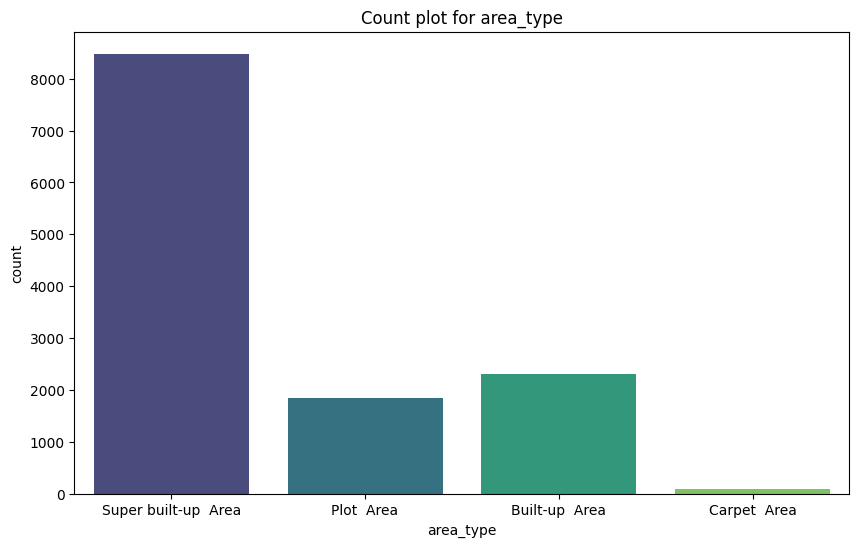

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\3608197491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=n,palette = 'viridis')


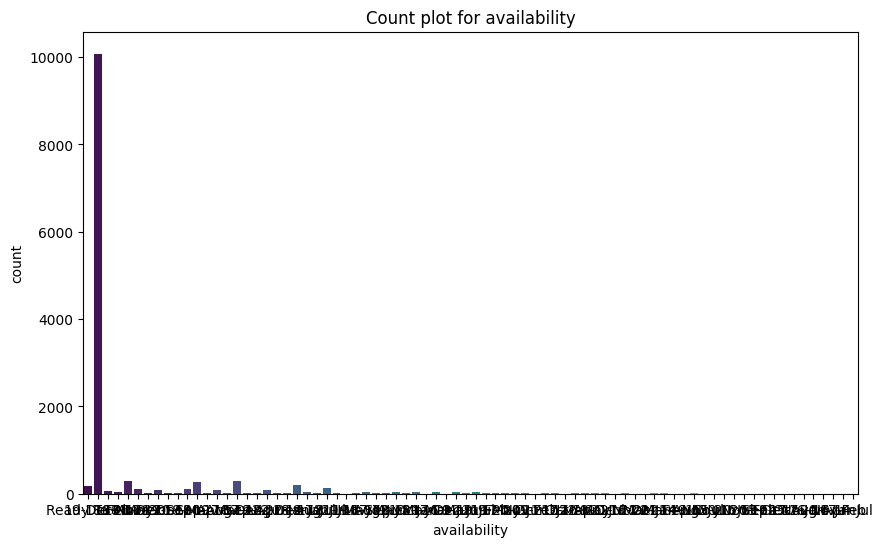

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\3608197491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=n,palette = 'viridis')


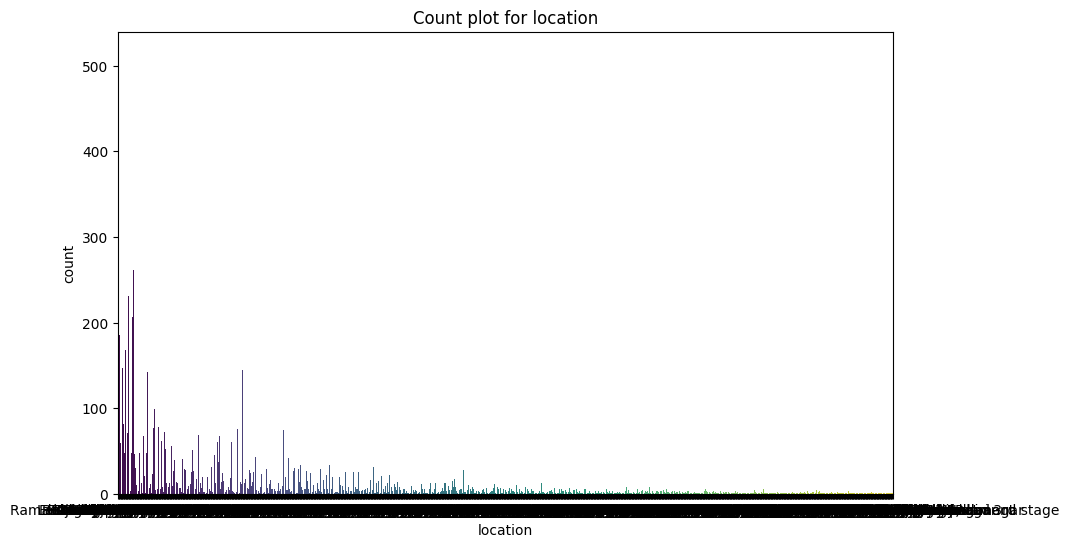

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\3608197491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=n,palette = 'viridis')


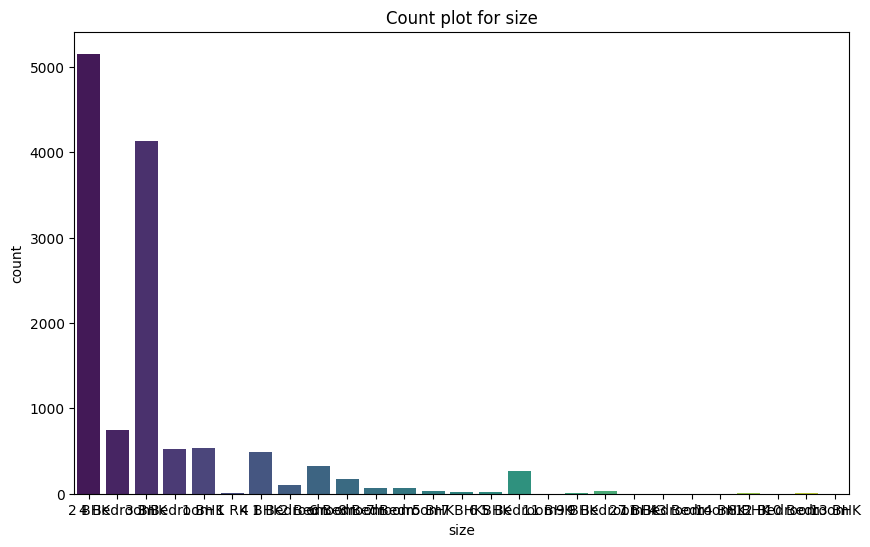

In [49]:
univariate_analysis(df_1)

In [50]:
df_1['size'].value_counts()

2 BHK         5152
3 BHK         4128
4 Bedroom      749
1 BHK          530
3 Bedroom      527
4 BHK          489
2 Bedroom      328
5 Bedroom      263
6 Bedroom      169
1 Bedroom      105
7 Bedroom       69
8 Bedroom       65
5 BHK           36
9 Bedroom       29
6 BHK           23
7 BHK           16
1 RK            13
9 BHK            5
8 BHK            3
10 Bedroom       3
11 Bedroom       2
11 BHK           1
27 BHK           1
43 Bedroom       1
14 BHK           1
12 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [51]:
df_1.corr()

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\2471619009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()


,total_sqft,bath,balcony,price
total_sqft,1.000000,0.377078,0.180061,0.547876
bath,0.377078,1.000000,0.204191,0.459736
balcony,0.180061,0.204191,1.000000,0.120363
price,0.547876,0.459736,0.120363,1.000000


In [55]:
df_1 = df_1.drop(columns = ['size'],axis = 1 )

In [57]:
df_1 = df_1.drop(columns = ['location'],axis = 1 )

In [58]:
df_1

,area_type,availability,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,4689,4.0,1.0,488.00


In [61]:
df_1['availability'].value_counts()

Ready To Move    10077
18-Dec             291
18-May             282
18-Apr             261
18-Aug             200
                 ...  
15-Dec               1
20-Feb               1
16-Jul               1
14-Nov               1
14-Jul               1
Name: availability, Length: 78, dtype: int64

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\3608197491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=n,palette = 'viridis')


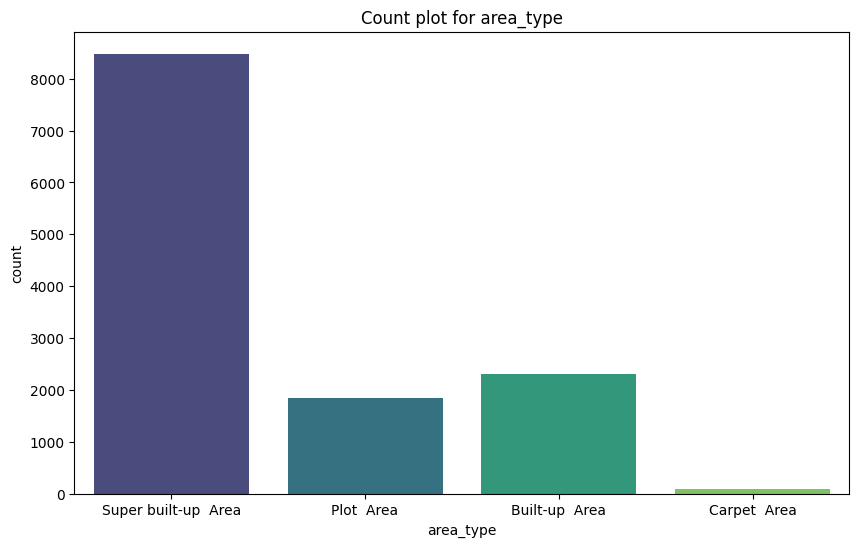

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\3608197491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=n,palette = 'viridis')


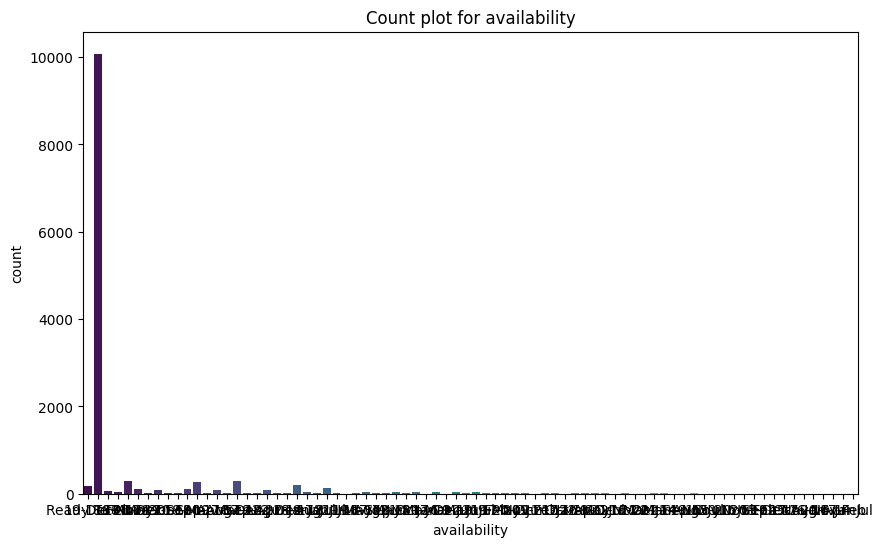

In [62]:
univariate_analysis(df_1)

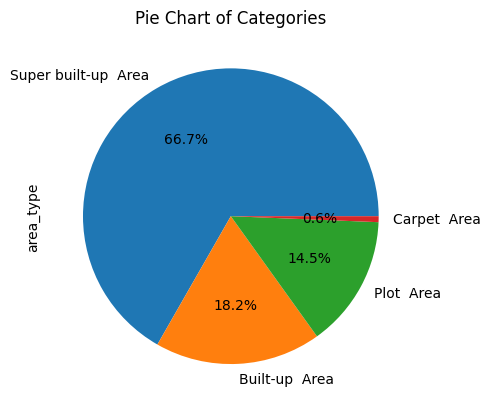

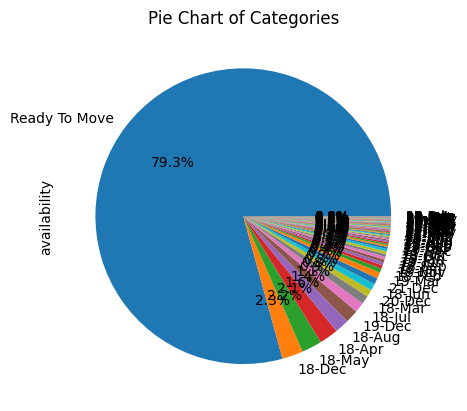

In [169]:
df_1['area_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.show()

df_1['availability'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.show()

Based on the data, it appears that the likelihood of purchasing a house increases with the super built-up area. This suggests that buyers are more inclined to invest in properties with larger super built-up areas compared to those with smaller areas. Additionally, a significant number of the properties available are "ready-to-move-in," which means they are fully constructed and available for immediate occupancy. This trend indicates that buyers might prefer properties that are immediately livable and offer more space.

In [67]:
df_1

,area_type,availability,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,4689,4.0,1.0,488.00


In [75]:
df_1['area_type'] = df_1['area_type'].astype('category')
df_1['availability'] = df_1['availability'].astype('category')


In [76]:
def bivariate_analysis(df, x_col, y_col):
    """
    Perform bivariate analysis based on the types of x_col and y_col.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The name of the column to be used as the x-axis.
        y_col (str): The name of the column to be used as the y-axis.
    """
    
    # Check the data types of the columns
    x_type = df[x_col].dtype
    y_type = df[y_col].dtype
    
    # Categorical vs. Categorical
    if pd.api.types.is_categorical_dtype(df[x_col]) and pd.api.types.is_categorical_dtype(df[y_col]):
        plt.figure(figsize=(10, 6))
        crosstab = pd.crosstab(df[x_col], df[y_col])
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'{x_col} vs. {y_col} (Categorical)')
        plt.xlabel(x_col)
        plt.ylabel('Count')
        plt.legend(title=y_col)
        plt.show()
    
    # Categorical vs. Numerical
    elif pd.api.types.is_categorical_dtype(df[x_col]) and pd.api.types.is_numeric_dtype(df[y_col]):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=x_col, y=y_col, data=df, palette='viridis')
        plt.title(f'{x_col} vs. {y_col} (Categorical vs. Numerical)')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
    
    # Numerical vs. Numerical
    elif pd.api.types.is_numeric_dtype(df[x_col]) and pd.api.types.is_numeric_dtype(df[y_col]):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=x_col, y=y_col, data=df, color='blue')
        plt.title(f'{x_col} vs. {y_col} (Numerical)')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
    
    else:
        raise ValueError("Unsupported combination of column types. Ensure correct column types for analysis.")

# Example usage
# data = {
#     'Property_Type': ['Apartment', 'Villa', 'Apartment', 'Villa', 'Apartment'],
#     'Price': [500000, 1200000, 600000, 1500000, 550000],
#     'Ready_to_Move': ['Yes', 'No', 'Yes', 'No', 'Yes'],
#     'Size_in_Sqft': [800, 1200, 1500, 1800, 2200]
# }
# df = pd.DataFrame(data)

# Example calls to the function



<Figure size 1000x600 with 0 Axes>

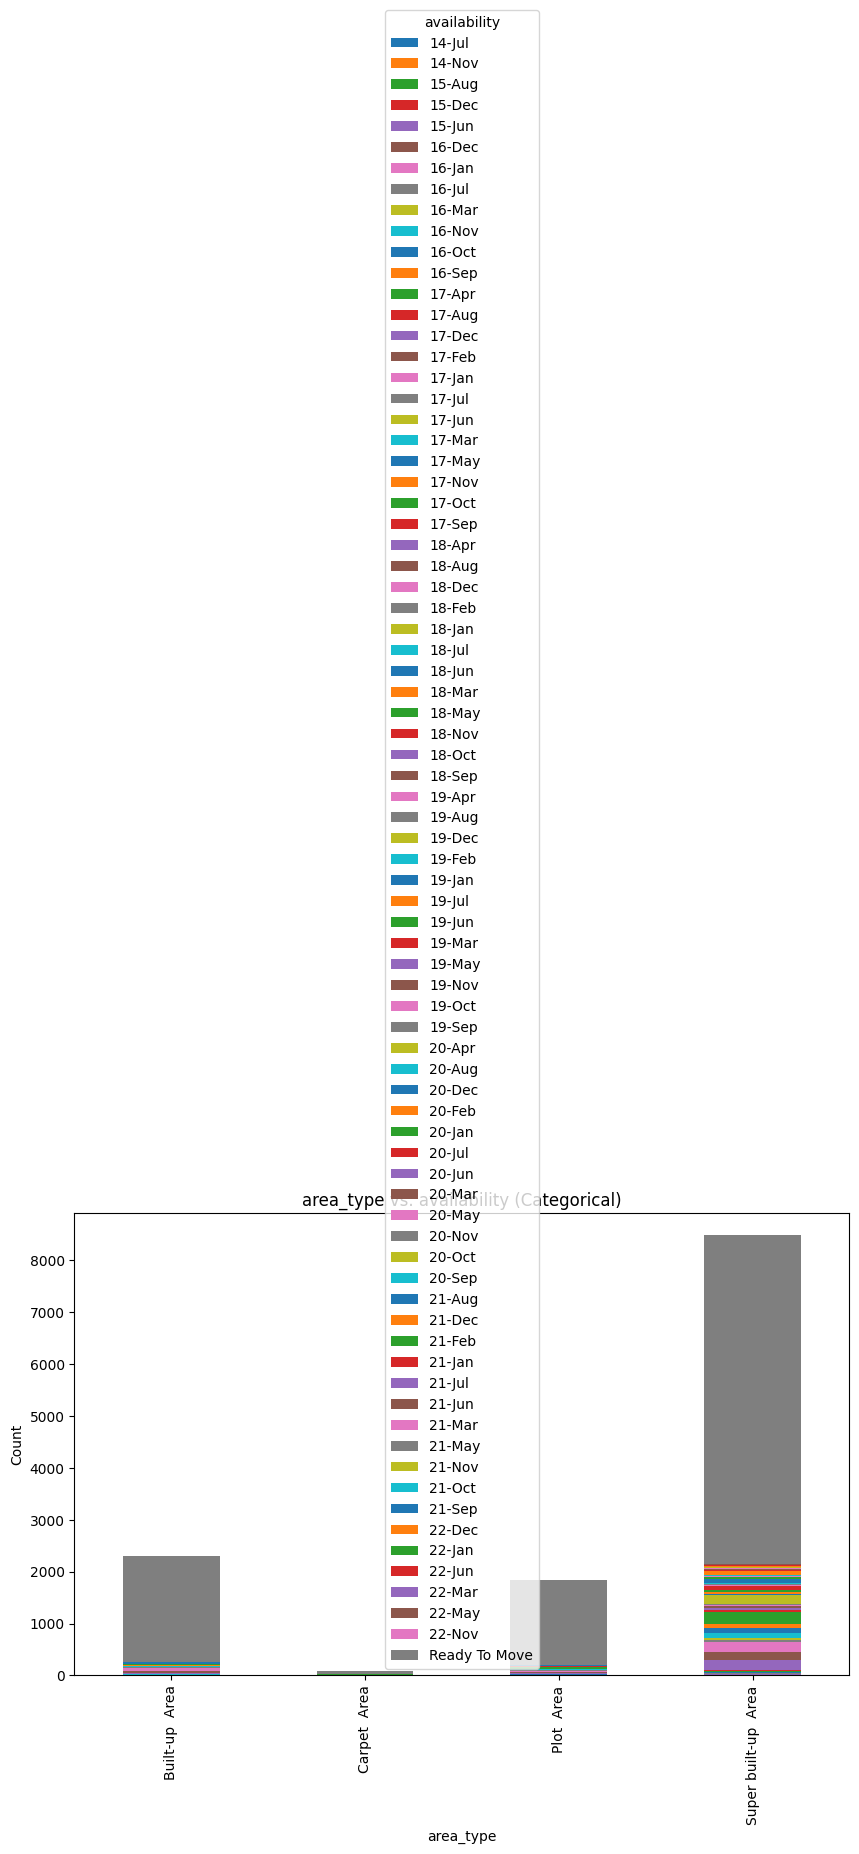

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\4003251311.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_col, y=y_col, data=df, palette='viridis')


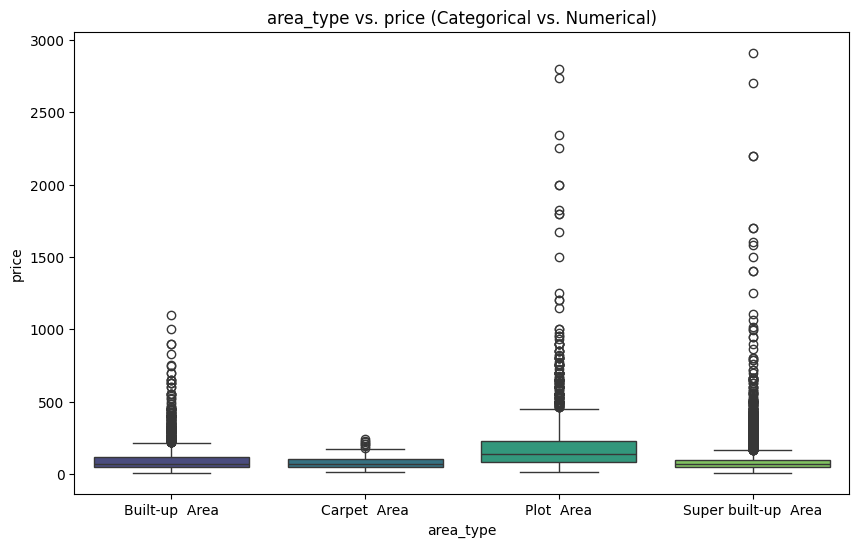

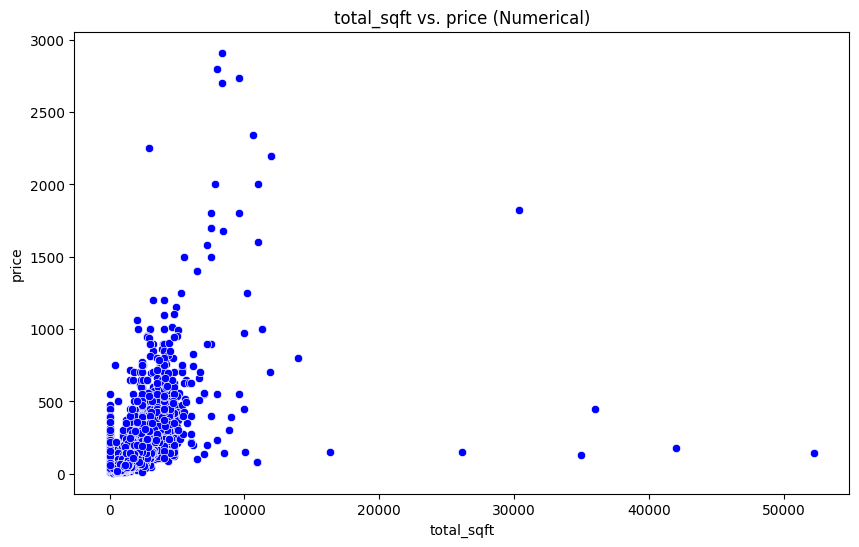

In [78]:
bivariate_analysis(df_1,'area_type', 'availability')  # Categorical vs. Categorical
bivariate_analysis(df_1, 'area_type', 'price')          # Categorical vs. Numerical
bivariate_analysis(df_1, 'total_sqft', 'price')           # Numerical vs. Numerical

## Handling Outliers and Converting Categorical Data into Numeric Data

In [86]:
def remove_outliers(df):

    if not isinstance(df,pd.DataFrame):
        raise TypeError('should be a DataFrame')

    df_cleaned = df.copy()
    numeric_columns = df_cleaned.select_dtypes(include=['number']).columns


    for column in numeric_columns:

        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_fence = Q1 - 1.5*(IQR)
        upper_fence = Q3 + 1.5*(IQR)
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_fence) & (df_cleaned[column] <= upper_fence)]

    return df_cleaned
    

C:\Users\91992\AppData\Local\Temp\ipykernel_1500\4003251311.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_col, y=y_col, data=df, palette='viridis')


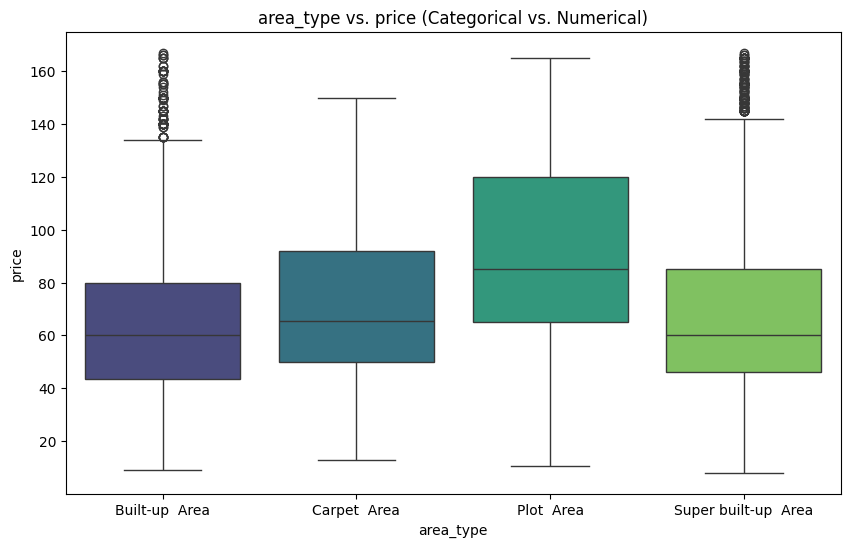

In [93]:
# Ensure outliers are removed before analysis
df_cleaned = remove_outliers(df_1)

# Perform bivariate analysis using the cleaned DataFrame
bivariate_analysis(df_cleaned, 'area_type', 'price')


In [98]:
df_cleaned.describe()

,total_sqft,bath,balcony,price
count,10418.000000,10418.000000,10418.000000,10418.000000
mean,1268.219908,2.270781,1.560280,69.570897
std,354.686004,0.650439,0.764897,31.908020
min,284.000000,1.000000,0.000000,8.000000
25%,1070.000000,2.000000,1.000000,46.000000
50%,1213.000000,2.000000,2.000000,62.000000
75%,1475.000000,3.000000,2.000000,86.000000
max,2440.000000,4.000000,3.000000,167.000000


## 1. Handling Outliers

Outliers are data points that deviate significantly from the rest of the data. They can skew the results of your analysis and models, so it’s important to identify and handle them appropriately. Here’s how you can handle outliers:

### Identification

Use Statistical Methods: One common approach is to use the Interquartile Range (IQR) method:

- **Calculate Quartiles**: Compute the first (Q1) and third (Q3) quartiles for each numeric column.
  
- **Compute IQR**: The IQR is the difference between Q3 and Q1.
  
- **Determine Fences**: Calculate the lower and upper fences as follows:
  - **Lower Fence**: \( \text{Lower Fence} = Q1 - 1.5 \times \text{IQR} \)
  - **Upper Fence**: \( \text{Upper Fence} = Q3 + 1.5 \times \text{IQR} \)

- **Filter Outliers**: Remove rows where values fall outside these fences.


In [99]:
df_cleaned = df_cleaned.drop(columns = 'availability')

In [100]:
df_cleaned

,area_type,total_sqft,bath,balcony,price
0,Super built-up Area,1056,2.0,1.0,39.07
2,Built-up Area,1440,2.0,3.0,62.00
3,Super built-up Area,1521,3.0,1.0,95.00
4,Super built-up Area,1200,2.0,1.0,51.00
5,Super built-up Area,1170,2.0,1.0,38.00
...,...,...,...,...,...
13312,Super built-up Area,1262,2.0,2.0,47.00
13313,Super built-up Area,1345,2.0,1.0,57.00
13314,Super built-up Area,1715,3.0,3.0,112.00
13317,Built-up Area,1141,2.0,1.0,60.00


In [105]:
df_encoded = pd.get_dummies(df_cleaned)
df_encoded

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1056,2.0,1.0,39.07,0,0,0,1
2,1440,2.0,3.0,62.00,1,0,0,0
3,1521,3.0,1.0,95.00,0,0,0,1
4,1200,2.0,1.0,51.00,0,0,0,1
5,1170,2.0,1.0,38.00,0,0,0,1
...,...,...,...,...,...,...,...,...
13312,1262,2.0,2.0,47.00,0,0,0,1
13313,1345,2.0,1.0,57.00,0,0,0,1
13314,1715,3.0,3.0,112.00,0,0,0,1
13317,1141,2.0,1.0,60.00,1,0,0,0


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = df_encoded.select_dtypes(include=['number']).columns
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [116]:
df_encoded

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,-0.598360,-0.416326,-0.732527,-0.955947,-0.466045,-0.079236,-0.307689,0.609962
2,0.484339,-0.416326,1.882331,-0.237284,2.145714,-0.079236,-0.307689,-1.639447
3,0.712721,1.121172,-0.732527,0.796988,-0.466045,-0.079236,-0.307689,0.609962
4,-0.192348,-0.416326,-0.732527,-0.582041,-0.466045,-0.079236,-0.307689,0.609962
5,-0.276934,-0.416326,-0.732527,-0.989482,-0.466045,-0.079236,-0.307689,0.609962
...,...,...,...,...,...,...,...,...
13312,-0.017537,-0.416326,0.574902,-0.707408,-0.466045,-0.079236,-0.307689,0.609962
13313,0.216484,-0.416326,-0.732527,-0.393992,-0.466045,-0.079236,-0.307689,0.609962
13314,1.259710,1.121172,1.882331,1.329795,-0.466045,-0.079236,-0.307689,0.609962
13317,-0.358700,-0.416326,-0.732527,-0.299967,2.145714,-0.079236,-0.307689,-1.639447


In [119]:
corr = df_encoded.corr()
corr

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
total_sqft,1.000000,0.614704,0.337426,0.659509,-0.042071,-0.022503,-0.118024,0.114842
bath,0.614704,1.000000,0.269833,0.590331,-0.050255,0.008245,0.222636,-0.098941
balcony,0.337426,0.269833,1.000000,0.166743,-0.076882,-0.008635,-0.207085,0.198676
price,0.659509,0.590331,0.166743,1.000000,-0.058417,0.001408,0.203345,-0.078504
area_type_Built-up Area,-0.042071,-0.050255,-0.076882,-0.058417,1.000000,-0.036928,-0.143397,-0.764057
area_type_Carpet Area,-0.022503,0.008245,-0.008635,0.001408,-0.036928,1.000000,-0.024380,-0.129904
area_type_Plot Area,-0.118024,0.222636,-0.207085,0.203345,-0.143397,-0.024380,1.000000,-0.504440
area_type_Super built-up Area,0.114842,-0.098941,0.198676,-0.078504,-0.764057,-0.129904,-0.504440,1.000000


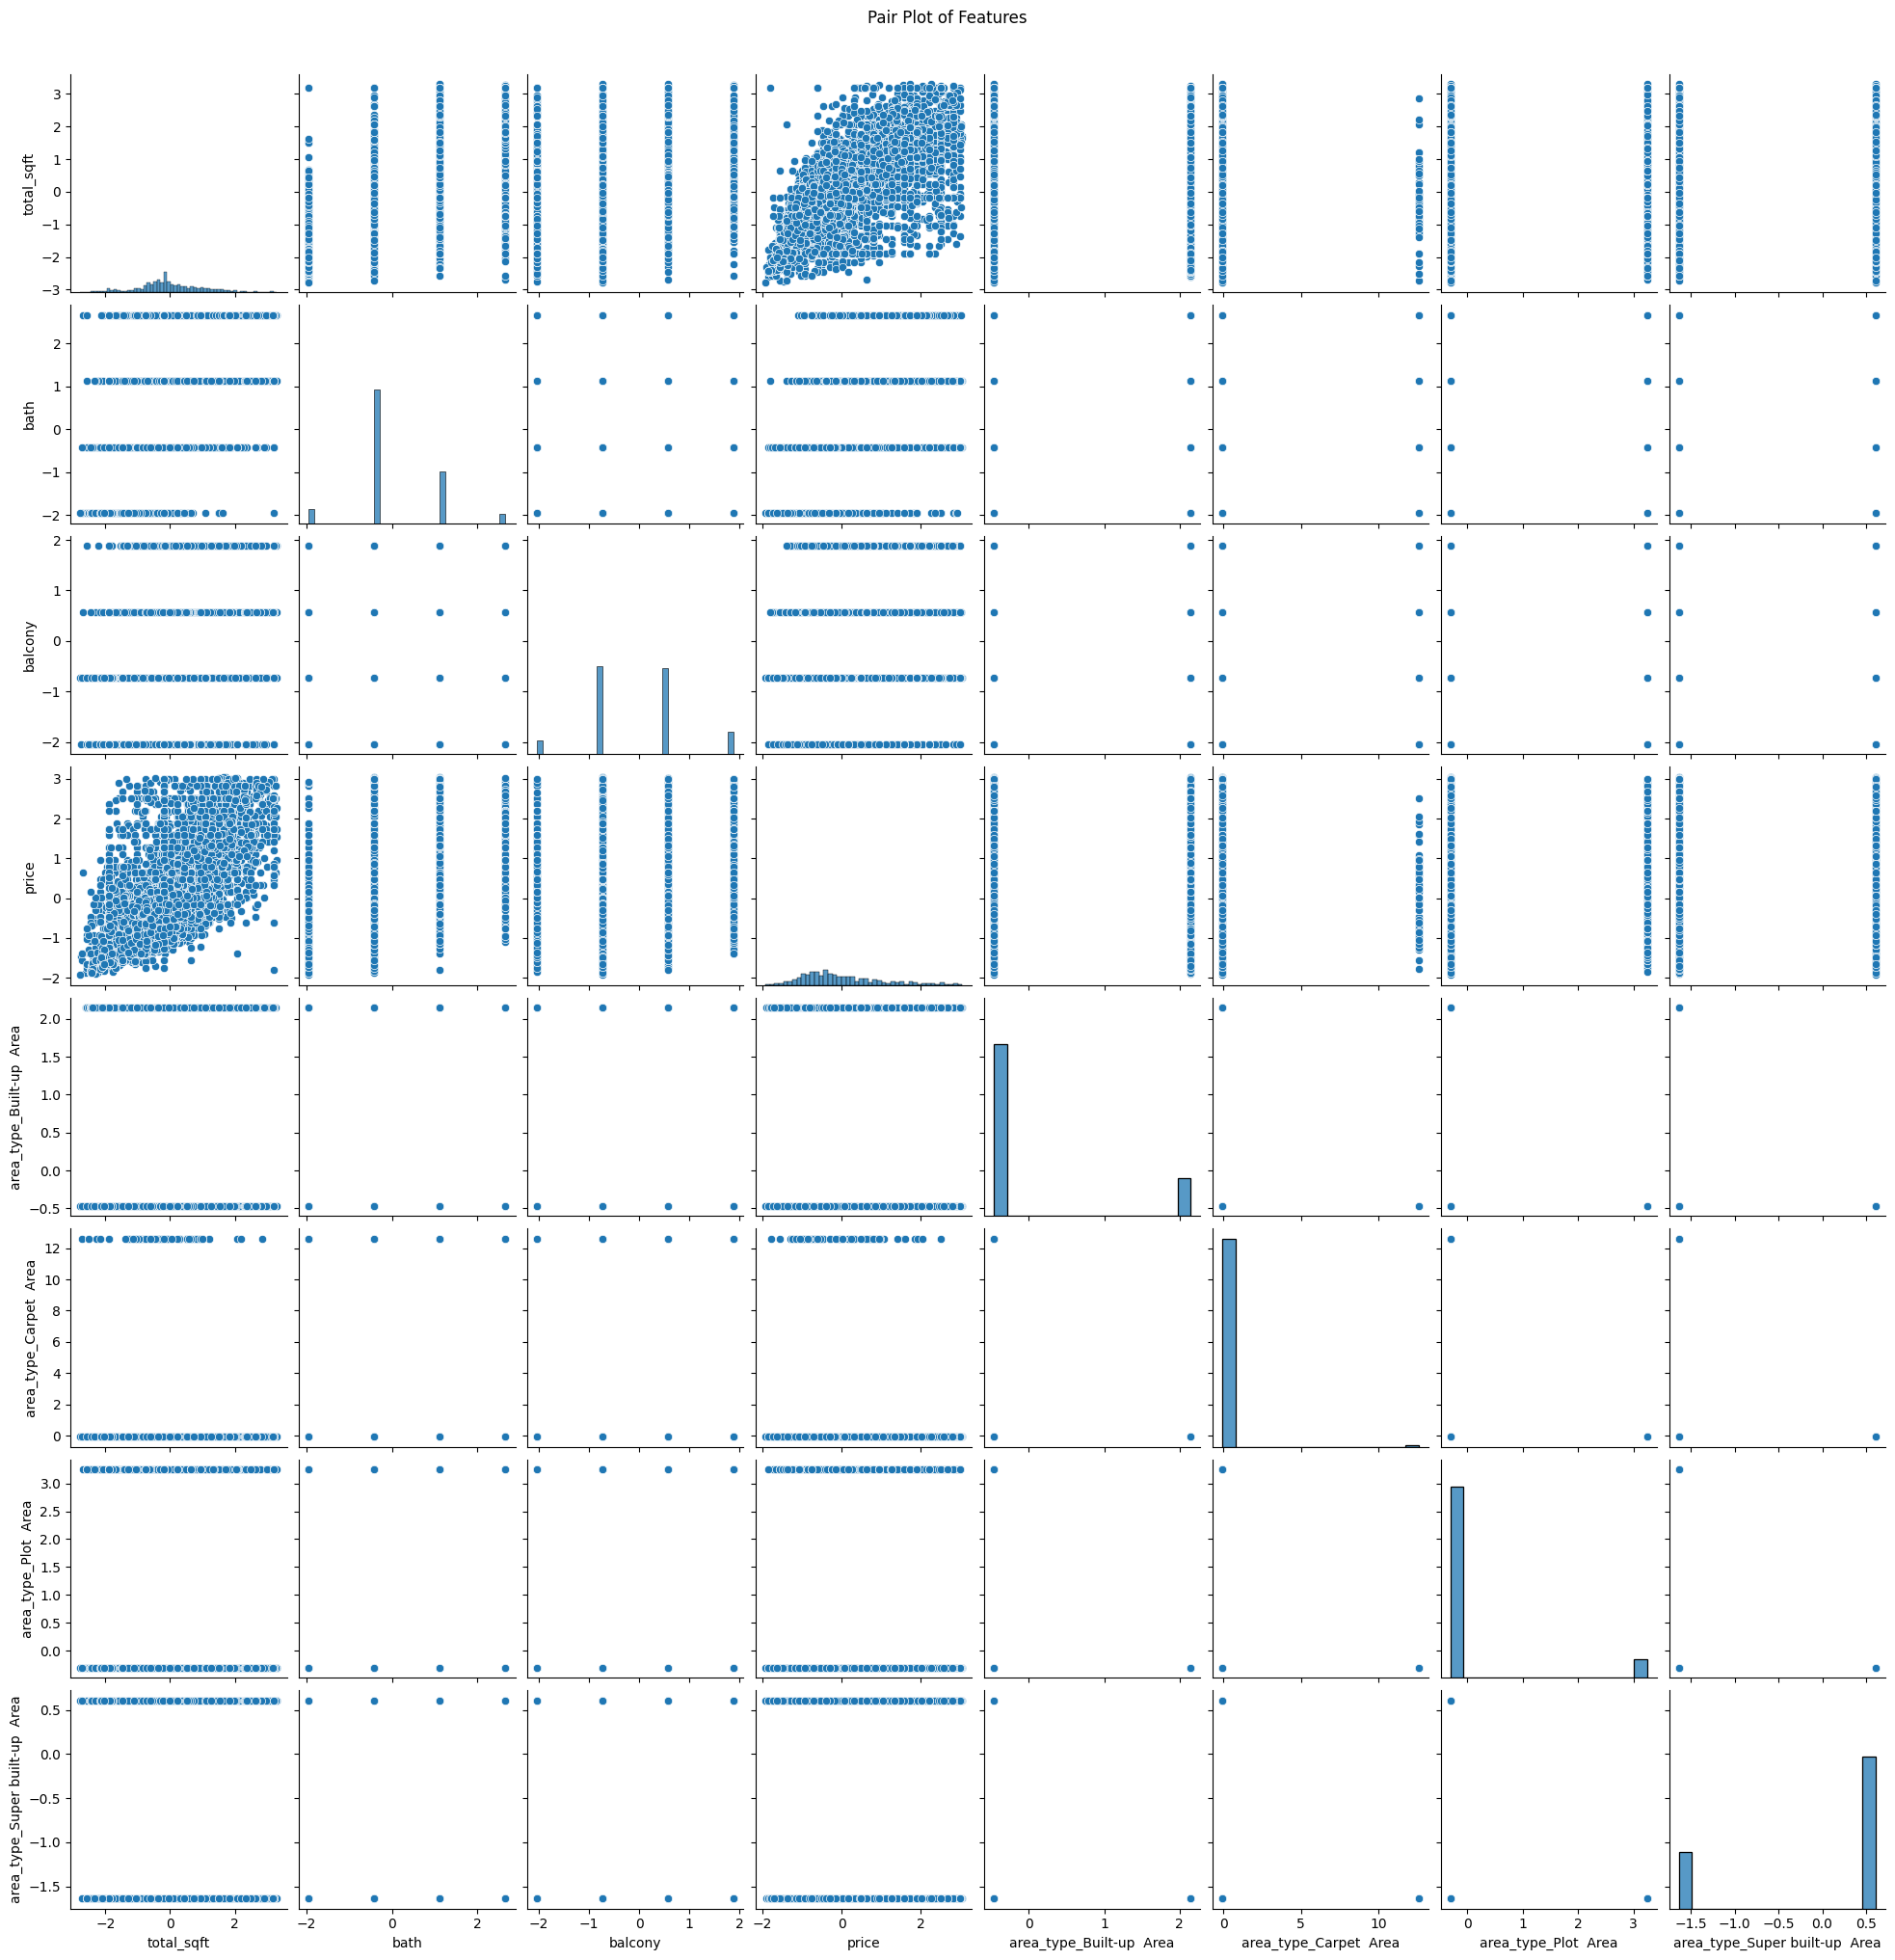

In [170]:
sns.pairplot(df_encoded)
plt.suptitle('Pair Plot of Features', y=1.02)  # Add a title to the plot
plt.show()

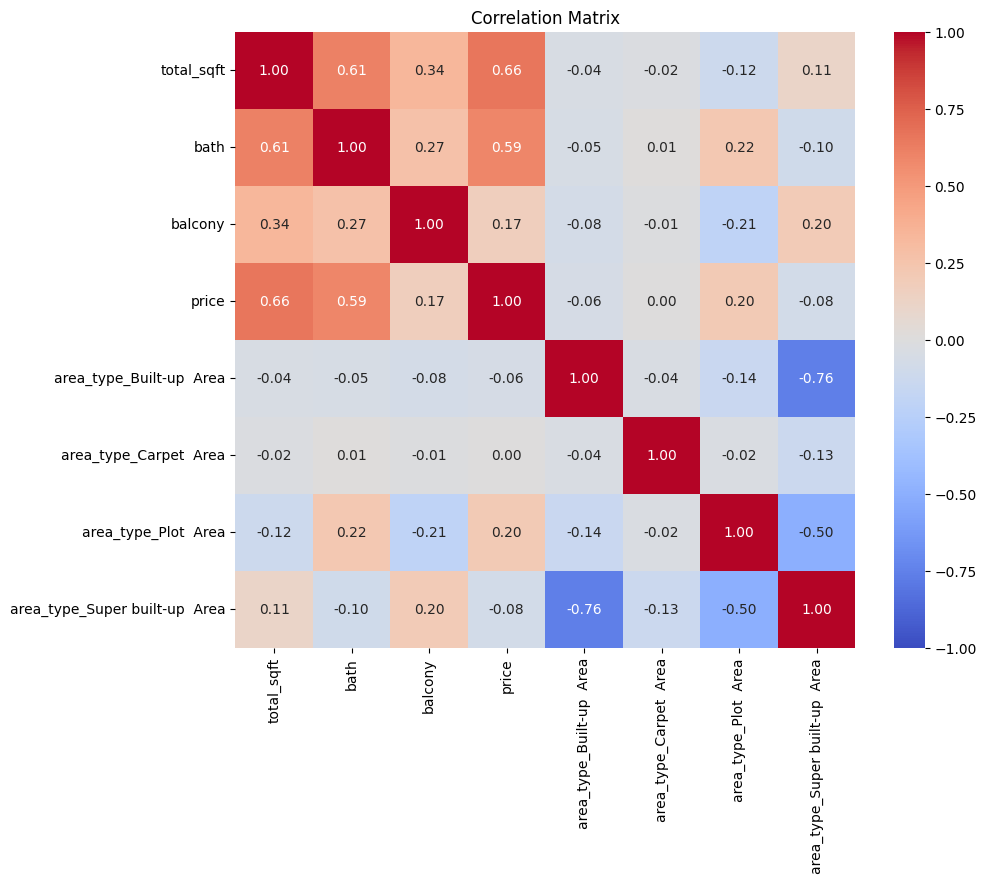

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Understanding Our Correlation Matrix

The correlation matrix shows the Pearson correlation coefficients between pairs of features. The values range from -1 to 1:

- **1 or -1**: Perfect positive or negative linear relationship.
- **0**: No linear relationship.
- **Values close to 1 or -1**: Strong positive or negative linear relationship.
- **Values close to 0**: Weak linear relationship.

## Key Points from Your Correlation Matrix

### Target Variable
- **`price`**: This is the variable you want to predict.

### Independent Variables
Features that are predictors of `price` include:

- **`total_sqft`**: Strong positive correlation (0.659) with `price`.
- **`bath`**: Moderate positive correlation (0.590) with `price`.
- **`balcony`**: Weak positive correlation (0.167) with `price`.
- **`area_type_*`**: Categorical features indicating area types; these are one-hot encoded.

## Selecting Features for Model Building

### Target Variable
- **`price`**: This is our target variable that you want to predict.

### Independent Variables

- **High Correlation with Target (`price`)**:
  - `total_sqft`
  - `bath`
  - `balcony` (less significant but still may be included)

- **Categorical Variables**:
  - One-hot encoded variables like `area_type_Built-up Area`, `area_type_Carpet Area`, `area_type_Plot Area`, and `area_type_Super built-up Area`.

## Feature Selection for Model Building

Based on the correlation matrix:

1. **Prepare the Data**:
   - **Target Variable**: `price`
   - **Independent Variables**: `total_sqft`, `bath`, `balcony`, and one-hot encoded area types.

2. **Create the Feature Matrix and Target Vector**:
   ```python
   # Define independent variables (features) and target variable
   features = ['total_sqft', 'bath', 'balcony', 'area_type_Built-up Area', 
               'area_type_Carpet Area', 'area_type_Plot Area', 
               'area_type_Super built-up Area']
   target = 'price'
   
   # Prepare the feature matrix (X) and target vector (y)
   X = df_encoded[features]
   y = df_encoded[target]


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [152]:
features = ['total_sqft', 'bath', 'balcony', 'area_type_Built-up  Area', 
               'area_type_Carpet  Area', 'area_type_Plot  Area', 
               'area_type_Super built-up  Area']
target = 'price'
   
   # Prepare the feature matrix (X) and target vector (y)
X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (8334, 7)
y_train shape: (8334,)
X_test shape: (2084, 7)
y_test shape: (2084,)


In [151]:
X.shape

(10418, 7)

In [138]:
y.shape

(10418,)

In [154]:
X_train.shape[0] == y_train.shape[0],

(True,)

In [155]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [156]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.4567858499802842
R-squared: 0.53668073161758


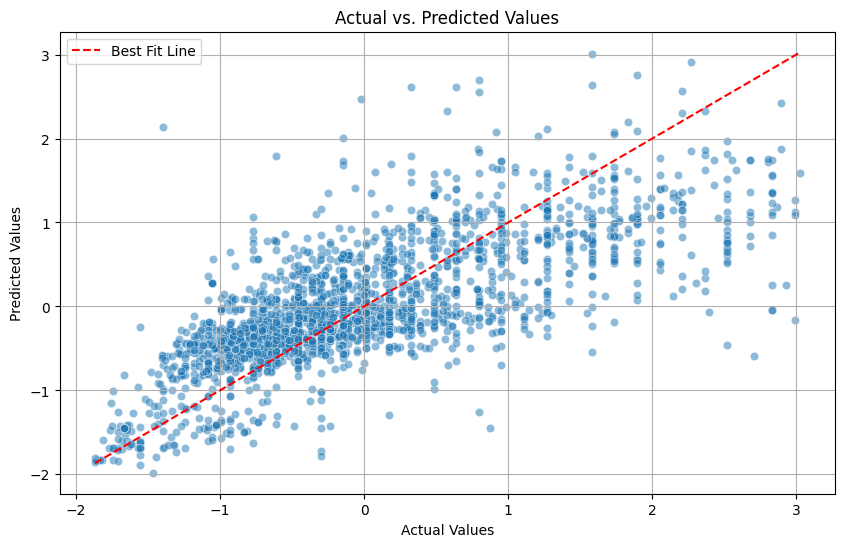

In [159]:
 results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5)

# Plot the best fit line (45-degree line where predicted = actual)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         'r--', label='Best Fit Line')

# Add titles and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')


Random Forest Mean Squared Error: 0.44201337548554803
Random Forest R-squared: 0.5516644971510232


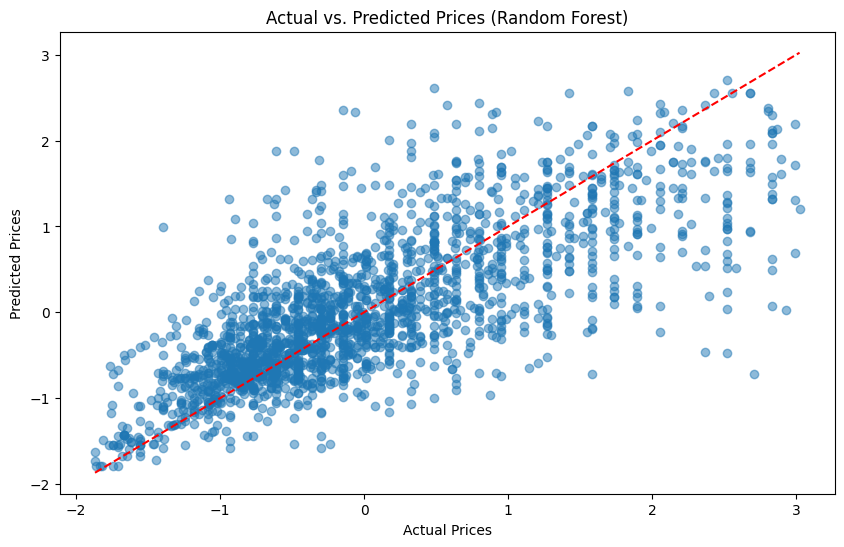

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.show()

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define a smaller parameter distribution
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                    n_iter=20, cv=3, scoring='neg_mean_squared_error', 
                                    verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best parameters: {best_params}")
print(f"Best model: {best_model}")


C:\Users\91992\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Best model: RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)


In [166]:
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.41527404818345887
R-squared: 0.5787862776597161


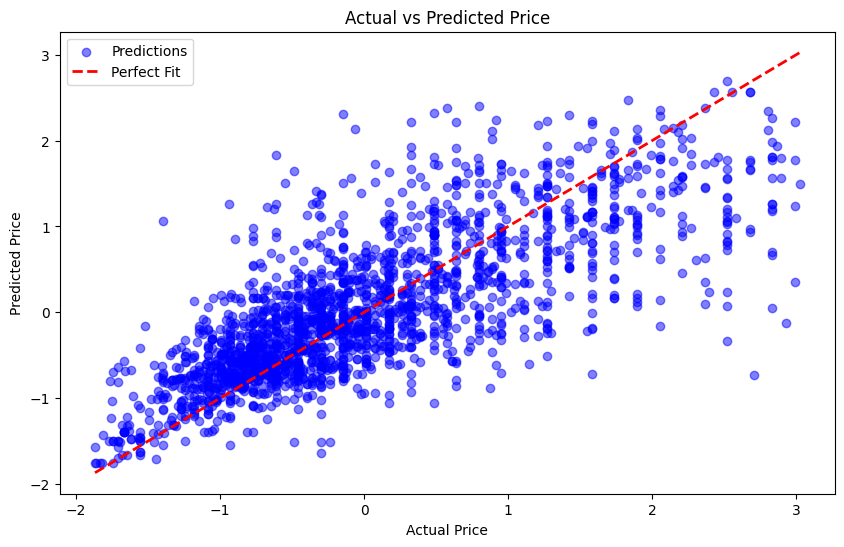

In [167]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

## Final Conclusion

### Final Conclusion for Model Evaluation

#### **Model Comparison and Selection**

1. **Model Performance:**
   - **Linear Regression:**
     - **Mean Squared Error (MSE):** 0.4568
     - **R-squared (R²):** 0.5367
     - The Linear Regression model provided a baseline, with reasonable performance but room for improvement in accuracy and fit.

   - **Random Forest Regressor:**
     - **Initial Mean Squared Error (MSE):** 0.4420
     - **Initial R-squared (R²):** 0.5517

     After hyperparameter tuning:
     - **Tuned Mean Squared Error (MSE):** 0.4153
     - **Tuned R-squared (R²):** 0.5788

     The Random Forest Regressor initially outperformed the Linear Regression model, and hyperparameter tuning further improved its performance. The MSE decreased from 0.4420 to 0.4153, and R² increased from 0.5517 to 0.5788, indicating enhanced accuracy and a better fit to the data.

2. **Model Evaluation:**
   - **Random Forest Regressor** after tuning shows a significant improvement in performance metrics, validating its effectiveness as a robust predictive model for house prices.
   - The **hyperparameter tuning** process optimized the model’s parameters, resulting in a more accurate and reliable model.

3. **Feature Importance:**
   - The Random Forest model's ability to provide feature importance helps in understanding which features are most influential in predicting house prices. This insight can be used for further refinement and feature engineering.

4. **Visualizations:**
   - Visualizations such as pair plots and correlation matrices provided valuable insights into the relationships between features and the target variable, aiding in feature selection and model evaluation.

5. **Future Recommendations:**
   - **Model Refinement:** Consider experimenting with other advanced models such as Gradient Boosting Machines or XGBoost to explore potential for further improvement.
   - **Feature Engineering:** Continue to explore and engineer features that might enhance model performance.
   - **Cross-Validation:** Employ cross-validation techniques to ensure the model’s robustness and generalizability across different subsets of the data.

6. **Final Decision:**
   - The **Random Forest Regressor**, especially after hyperparameter tuning, is the recommended model for predicting house prices. Its improved performance metrics and robustness make it a superior choice over Linear Regression for this dataset.

---

This revised conclusion reflects the improvements achieved through hyperparameter tuning, highlighting the enhanced performance of the Random Forest Regressor.